In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

### Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python

#### Trabajo Practico 1

Integrantes:
* Ferreyra, Mario Ezequiel (<ferreyramario7@gmail.com>)
* Gonzalez, Maria Laura (<m.laugonzalez@gmail.com>)
* Kopp, Matias Nicolas  (<koppmatias97@gmail.com>)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import cv2
import PIL
import statistics

from PIL import Image, ImageOps
from sklearn.neighbors import KNeighborsClassifier

In [3]:
sns.set_style("whitegrid")

---

> **Ejercicio 1**

Realice y grafique una imagen con una cruz negra y fondo blanco.

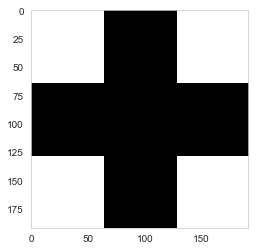

In [4]:
cruz = np.ones((192, 192))
cruz[:,64:129] = 0
cruz[64:129,:] = 0

### Another Solution ###
#width, height = (30, 30)
#start = width // 3
#end = start * 2

#cruz = np.zeros((height, width))
#cruz[:, start:end] = 1  # Haciendo raya vertical
#cruz[start:end, :] = 1  # Haciendo raya horizontal
########################

plt.imshow(cruz, cmap='gray')
plt.grid(False)
plt.show()

> **Ejercicio 2**

Realice y grafique una imagen con una cruz blanca y fondo negro (negativo de la primera).

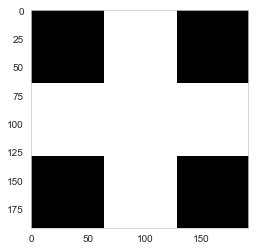

In [5]:
plt.imshow(1 - cruz, cmap='gray')
plt.grid(False)
### Another Solution ###
#width, height = (30, 30)
#start = width // 3
#end = start * 2

#cruz = np.zeros((height, width))
#cruz[:, start:end] = 0  # Haciendo raya vertical
#cruz[start:end, :] = 0  # Haciendo raya horizontal
########################

> **Ejercicio 3**

Realice y grafique, una imagen con cuatro bandas horizontales de intensidad homogénea decreciente de  1 a 0 de arriba abajo.

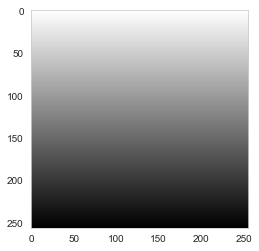

In [6]:
arr_image = np.empty((256, 256), 'uint8')

c = np.arange(256)
for i in c:
    arr_image[i, :] = 255 - c[i]

plt.imshow(arr_image, cmap="gray")
plt.grid(False)
plt.show()

(-0.5, 39.5, 39.5, -0.5)

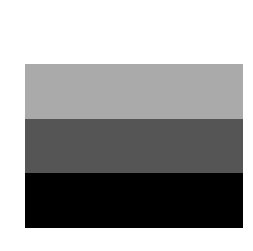

In [7]:
width, height = (40, 40)
bins = 4
assert bins <= height, "La cantidad de bins debería ser menor o igual que la altura!"

step = height // bins
intensity_step = 1 / bins
img = np.zeros((height, width))

for i, x in enumerate(range(0, height, step)):
    intensity = 1 - (intensity_step * i)
    _next = x + step
    img[x:_next, :] = intensity

plt.imshow(img, cmap="gray")
plt.grid(False)
plt.axis("off")

> **Ejercicio 4**

Construir y graficar una imagen 128x128  dividida en cuatro cuadrados de colores: rojo, azul, amarillo y uno a elección.

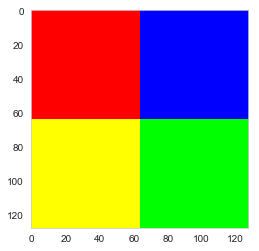

In [8]:
image = np.zeros((128, 128, 3), 'uint8')

image[:64, :64, 0] = 255  # Sector Rojo

image[:64, 64:, 2] = 255  # Sector Azul

image[64:, :64, 1] = 255  # Sector Amarillo
image[64:, :64:, 0] = 255  # Sector Amarillo

image[64:, 64:, 1] = 255  # Sector Verde

plt.imshow(image)
plt.grid(False)
plt.show()


### Another Solution ###
#width, height = (128, 128)
#channels = 3  # Cantidad de canales

#img = np.zeros((height, width, channels), dtype=int)
#vertical_center = width // 2
#horizontal_center = height // 2

#img[:horizontal_center, :vertical_center, 0] = 255  # Rojo
#img[:horizontal_center, vertical_center:, 2] = 255  # Azul

# Amarillo, es una mezcla entre verde y rojo
#img[horizontal_center:, :vertical_center, 0] = 255
#img[horizontal_center:, :vertical_center, 1] = 255

# Color a elección: rgb(247, 143, 179)
#img[horizontal_center:, vertical_center:, 0] = 247
#img[horizontal_center:, vertical_center:, 1] = 143
#img[horizontal_center:, vertical_center:, 2] = 179

#plt.imshow(img)
#plt.axis("off")
########################

> **Ejercicio 5**

Abrir una imagen guardada en un archivo, convertirla en Imagen monocroma, y graficar ambas imágenes a la par, colocarle título a ambas.

Text(0.5,1,'Messi Monocromo')

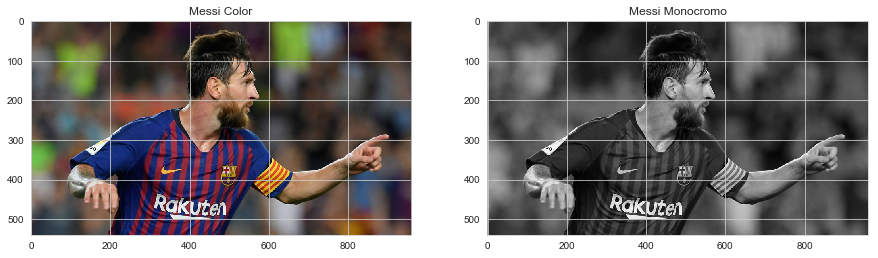

In [9]:
im = Image.open("./messi.jpg")
im_gray = im.convert(mode='L')

im_array = np.asarray(im)
im_gray_array = np.asarray(im_gray)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)

axs[0].imshow(im_array)
axs[0].set_title("Messi Color")

axs[1].imshow(im_gray_array, cmap="gray")
axs[1].set_title("Messi Monocromo")

(-0.5, 222.5, 201.5, -0.5)

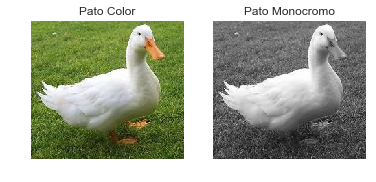

In [10]:
img_color = cv2.imread("pato.jpg")[..., ::-1]
img_gray  = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

_, (color, monocromo) = plt.subplots(1, 2)

color.set_title("Pato Color")
color.imshow(img_color)
color.axis("off")

monocromo.set_title("Pato Monocromo")
monocromo.imshow(img_gray, cmap="gray")
monocromo.axis("off")

> **Ejercicio 6** 

Construir y graficar una imagen a color que mezcle una imagen con paisaje a la que se le superponga una persona de otra imagen.

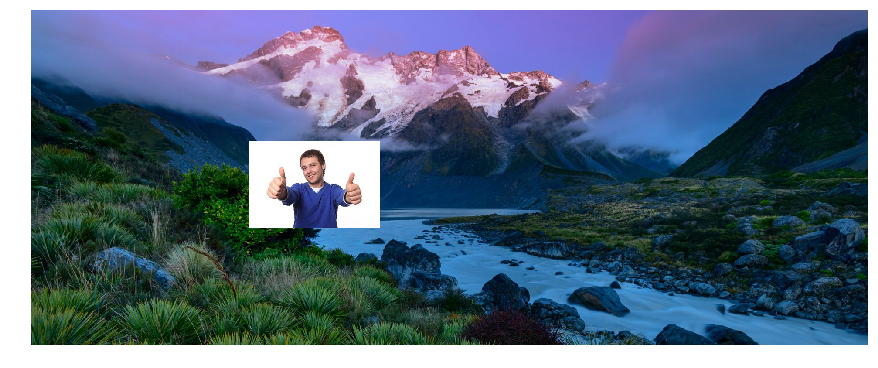

In [11]:
paisaje  = cv2.imread("./paisaje.jpg")[..., ::-1]
persona  = cv2.imread("./persona.jpg")[..., ::-1]
position = (500, 300)

y_offset = position[1] + persona.shape[0]
x_offset = position[0] + persona.shape[1]
img_final = paisaje
img_final[position[1]:y_offset, position[0]:x_offset, :] = persona

plt.imshow(img_final)
plt.grid(False)
plt.axis("off")

fig = plt.gcf()
fig.set_size_inches(15, 10)

> **Ejercicio 7**

Cargar una imagen monocroma y realizar por separado las siguientes modificaciones :  Aclararla, Oscurecerla y Obtener el negativo.

In [12]:
#im = Image.open('./messi.jpg')
#im_gray = im.convert(mode='L')
#im_inverted = ImageOps.invert(im_gray)
#im_clarified = np.asarray(im_gray) * 2
#im_darkened = np.asarray(im_gray) / 10

#fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
#fig.set_figheight(10)
#fig.set_figwidth(15)

#axs[0][0].imshow(np.asarray(im_gray), cmap="gray")
#axs[0][0].set_title("Imagen Monocroma")

#axs[0][1].imshow(np.asarray(im_inverted), cmap="gray")
#axs[0][1].set_title("Imagen Negativa")

#axs[1][0].imshow(im_clarified.astype(np.uint8), cmap="gray")
#axs[1][0].set_title("Imagen Aclarada")

#axs[1][1].imshow(im_darkened.astype(np.uint8), cmap="gray")
#axs[1][1].set_title("Imagen Oscurecida")

(-0.5, 222.5, 201.5, -0.5)

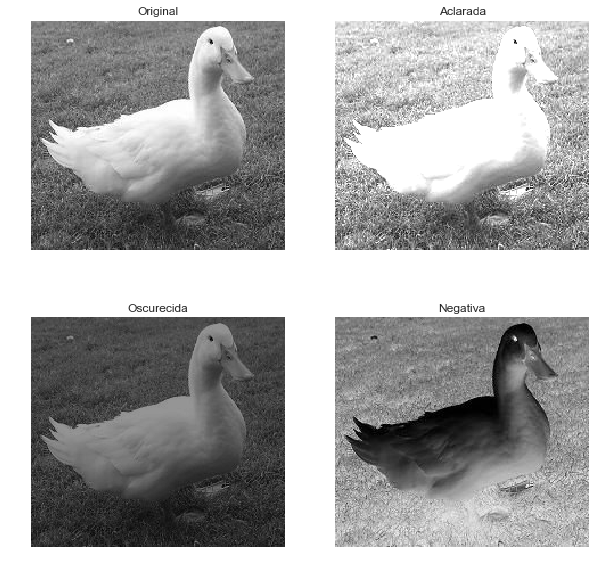

In [13]:
img = cv2.imread("./pato.jpg", cv2.IMREAD_GRAYSCALE)

fig, ((original, clarified), (darkened, inverted)) = plt.subplots(2, 2)
fig.set_size_inches(10, 10)

# Imagen original
original.imshow(img, cmap="gray", vmin=0, vmax=255)
original.set_title("Original")
original.axis("off")

# Aclarar imagen
img_clarified = img * 1.7
clarified.imshow(img_clarified, cmap="gray", vmin=0, vmax=255)
clarified.set_title("Aclarada")
clarified.axis("off")

# Oscurecer imagen
img_darkened = img / 1.7
darkened.imshow(img_darkened, cmap="gray", vmin=0, vmax=255)
darkened.set_title("Oscurecida")
darkened.axis("off")

# Negativo de imagen
img_inverted = cv2.bitwise_not(img)
inverted.imshow(img_inverted, cmap="gray", vmin=0, vmax=255)
inverted.set_title("Negativa")
inverted.axis("off")

> **Ejercicio 8**

Obtener el valor de gris más repetido en cada imagen.

In [14]:
img = cv2.imread("./pato.jpg", cv2.IMREAD_GRAYSCALE)

img_clarified = (img * 1.7).astype("uint8")
img_darkened = (img / 1.7).astype("uint8")
img_inverted = cv2.bitwise_not(img)

hist_original = cv2.calcHist([img], [0], None, [256], [0,256])
gris_original = np.argmax(hist_original)

hist_clarified = cv2.calcHist([img_clarified], [0], None, [256], [0,256])
gris_clarified = np.argmax(hist_clarified)

hist_darkened = cv2.calcHist([img_darkened], [0], None, [256], [0,256])
gris_darkened = np.argmax(hist_darkened)

hist_inverted = cv2.calcHist([img_inverted], [0], None, [256], [0,256])
gris_inverted = np.argmax(hist_inverted)

print(f"Max gris original:    {gris_original}")
print(f"Max gris aclarada:    {gris_clarified}")
print(f"Max gris oscurecida:  {gris_darkened}")
print(f"Max gris negativa:    {gris_inverted}")

Max gris original:    123
Max gris aclarada:    209
Max gris oscurecida:  72
Max gris negativa:    132


> **Ejercicio 9**

Aplicar una máscara  de suavizado de 5x5 a la componente roja de una imagen a elección, un filtro de bordes a la componente verde componer una imagen a color donde se reemplace las componentes rojas y verdes modificadas.

(-0.5, 222.5, 201.5, -0.5)

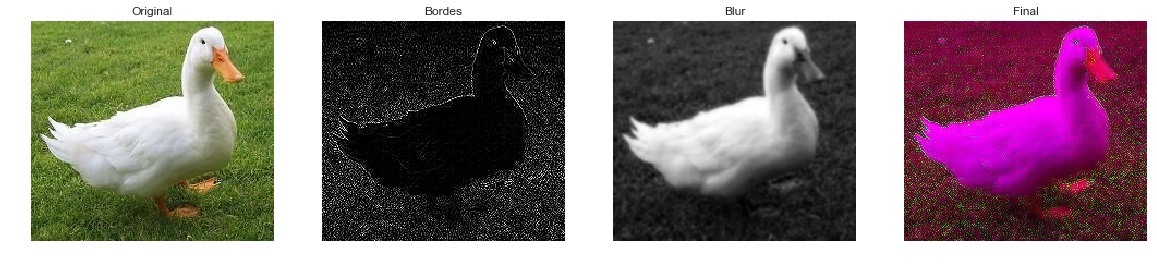

In [15]:
img = cv2.imread("./pato.jpg")[..., ::-1]

img_blur = cv2.GaussianBlur(img[..., 2], (5, 5), 0)
img_borders = cv2.Laplacian(img[..., 1], cv2.CV_8U)

new_img = img.copy()
new_img[..., 2] = img_blur
new_img[..., 1] = img_borders

fig, (original, borders, blur, final) = plt.subplots(1, 4)
fig.set_size_inches(20, 5)

original.imshow(img, cmap="gray")
original.set_title("Original")
original.axis("off")

borders.set_title("Bordes")
borders.imshow(img_borders, cmap="gray")
borders.axis("off")

blur.set_title("Blur")
blur.imshow(img_blur, cmap="gray")
blur.axis("off")

final.set_title("Final")
final.imshow(new_img, cmap="gray")
final.axis("off")

> **Ejercicio 10**

Binarice una imagen a elección buscando demarcar uno o varios objetos en esta (puede ser eligiendo un umbral a partir del histograma de una imagen monocroma).

Al resultado aplicarle 2 o 3 filtros morfológicos en el orden que crea adecuado para mejorar la segmentación con elemento  estructurante creado por usted, según crea adecuado para el problema (justifique).

In [16]:
img = cv2.imread("./munecos.jpg")[..., ::-1]

# Se oscurece la imagen un poco por la diferencia de intensidad entre los objetos
img_monocrome = (cv2.imread("munecos.jpg", 0) * 0.5).astype("uint8")

Binarizamos la imagen utilizando un umbral adaptativo.

Se utilizó un umbral adaptativo por la diferencia de intensidad de color entre los distintos muñecos. Si fueramos a utilizar un unico valor de umbral encontraríamos muy dificil segmentar los objetos muy claros de los más oscuros.

En este caso particular, utilizamos un umbral adaptativo definido por la media entre los vecinos más cercanos menos la constante C.

In [17]:
img_binary = cv2.adaptiveThreshold(img_monocrome, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)

Para mejorar la segmentación se utilizaron dos operaciones:
* **Morphological Gradient (Gradiente Morfológica)**:
    Esta operación es la diferencia entre la dilatación y la erosión de la imagen binarizada.
    Es de utilidad para este caso porque mejora los contornos y agrega una especie de "borde" a los objetos resultantes de la binarización anterior.
        
* **Erode (Erosión)**:
    Si bien la imagen resultante de aplicar la operación anterior es bastante buena, todavía existían casos donde la segmentación entre objetos no estaba bien definida. 
    Como es el caso entre los objetos de colores similares que estaban cercanos entre sí. Para eso utilizamos la operación de erosión que nos permite encoger los contornos generados anteriormente y mejorar esa segmentación.

In [18]:
gradient_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
erode_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

img_filtros = cv2.morphologyEx(img_binary, cv2.MORPH_GRADIENT, gradient_kernel)
img_filtros = cv2.erode(img_binary, erode_kernel, iterations=1)

> **Ejercicio 11**

Mostrar en una misma ventana, la imagen original, la binaria y la resultante de aplicarle los filtros.

Comente si tuvo buenos resultados.

(-0.5, 1134.5, 915.5, -0.5)

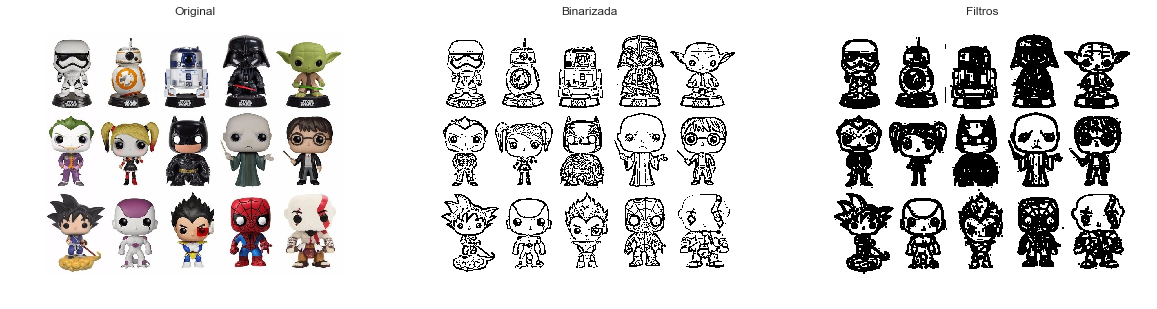

In [19]:
fig, (original, binarizada, filtros) = plt.subplots(1, 3) 
fig.set_size_inches(20, 5)

original.imshow(img)
original.set_title("Original")
original.axis("off")

binarizada.imshow(img_binary, cmap="gray")
binarizada.set_title("Binarizada")
binarizada.axis("off")

filtros.imshow(img_filtros, cmap="gray")
filtros.set_title("Filtros")
filtros.axis("off")

Los resultados parecen ser bastante buenos, definiendo una segmentación clara entre los objetos de la imagen. Aún quedan desperfectos en la imagen final generada por el ruido de la binarización que podrían causar problemas a la hora de encontrar los contornos de los objetos.

> **Ejercicio 12**

Encuentre bordes o el contorno del objeto u objetos en la imagen binaria utilizando operaciones morfológicas.

Se detectaron 15 objetos


(-0.5, 1134.5, 915.5, -0.5)

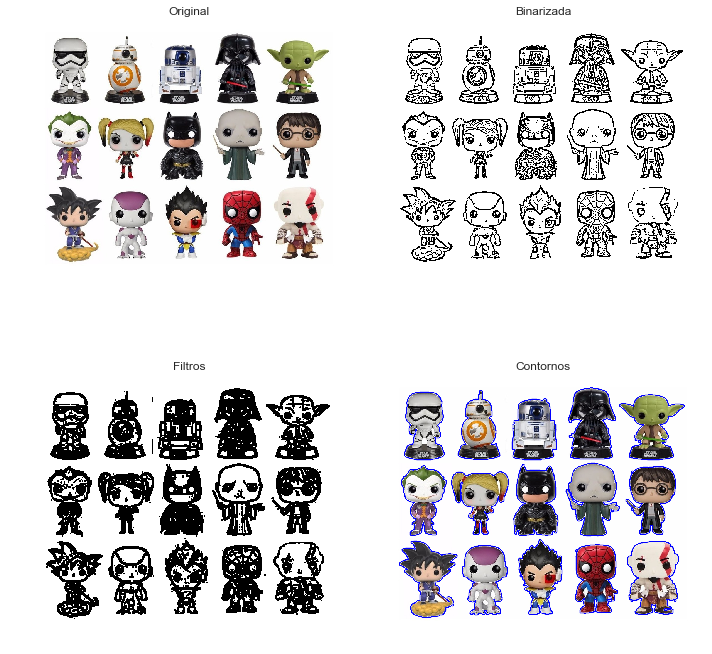

In [20]:
final = img.copy()
contours, _ = cv2.findContours(img_filtros, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
suma = 0

for c in contours:
    area = cv2.contourArea(c)
    if (area > 20000) and (area < 60000):
        cadauna = cv2.drawContours(final, [c], 0, (0, 0, 255), 2, cv2.LINE_AA)
        suma += 1
        
print(f"Se detectaron {suma} objetos")
fig, ((original, binarizada), (filtros, contornos)) = plt.subplots(2, 2) 
fig.set_size_inches(10, 10)
fig.tight_layout()

original.imshow(img)
original.set_title("Original")
original.axis("off")

binarizada.imshow(img_binary, cmap="gray")
binarizada.set_title("Binarizada")
binarizada.axis("off")

filtros.imshow(img_filtros, cmap="gray")
filtros.set_title("Filtros")
filtros.axis("off")

contornos.imshow(final)
contornos.set_title("Contornos")
contornos.axis("off")

> **Ejercicio 13**

Cargar una imagen a color (a elección), que a su criterio tenga entre 2 y 7 clases en ella:
- a) Explique coloquialmente la cantidad y el criterio visual que utilizó para identificarlas.

- b) Agregue una o dos características (capas, bandas, etc, pueden ser bordes de alguna componente) más a la imagen que considere puedan ser relevantes para la clasificación. 

- c) Construya una muestra de entrenamiento de la imagen utilizando todas las características.

- d) Realice un análisis exploratorio con gráficos de la muestra de entrenamiento discriminando con diferente color cada clase.

- e) Clasifíquela utilizando la muestra de entrenamiento y  K-NN  (k vecinos más cercanos). O con el método que guste.

- f) Generar una máscara o elemento estructural, y realice con éste una mejora de la clasificación obtenida en el ejercicio anterior utilizando un filtro de moda.  
     Mirando el resultado final decida si considera que la clasificación fue buena y si la cantidad de clases elegida fue la adecuada.

(174, 289, 3)


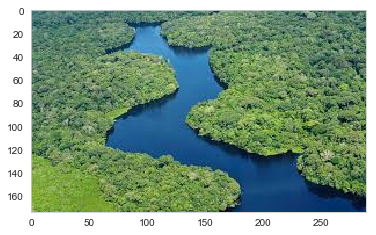

In [22]:
img = cv2.imread('./rio.jpeg')
print(img.shape)

plt.imshow(img[:,:,[2,1,0]])
plt.grid(False)
plt.show()

En la imagen mostrada anteriormente podemos distinguir 2 clases:
* Vegetacion
* Agua

El criterio elegido es para determinar las clases son la diferencia de colores entre la vegetacion y el agua.

In [23]:
# Creamos un DataFrame con los pixeles de la imagen

count_rows = img.shape[0]
count_cols = img.shape[1]
count_pixels = count_rows * count_cols
data0 = np.zeros([count_pixels, 3], dtype='int')
for i in range(count_rows):
    for j in range(count_cols):
        nro = i * count_cols + j
        data0[nro, :] = img[i, j, :]

df = pd.DataFrame(data0, columns=["azul", "verde", "rojo"])

print(f"Shape DataFrame: {df.shape}")
df.head()

Shape DataFrame: (50286, 3)


,azul,verde,rojo
0,117,117,69
1,113,113,65
2,108,108,60
3,133,133,85
4,125,127,81


Vamos a agregar una capa de bordes a la imagen para ayudar a la posterior clasificacion de la misma.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(174, 289, 3)


([], <a list of 0 Text yticklabel objects>)

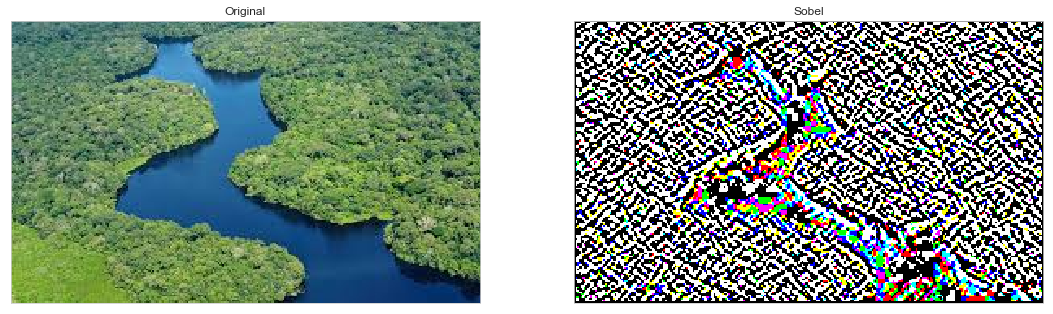

In [24]:
borders = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)  # Capa de bordes ()
print(borders.shape)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(1,2,1)
plt.imshow(img[:,:,[2,1,0]], cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(borders[:,:,[2,1,0]], cmap='gray', vmin=0, vmax=255)
plt.title('Sobel')
plt.xticks([])
plt.yticks([])

In [25]:
# Defino una imagen con 6 canales
# * 3 Primeros canales imagen original
# * 3 Ultimos canales con bordes

img2 = np.zeros((borders.shape[0], borders.shape[1], 6))
img2[:, :, 0:3] = img
img2[:, :, 3:6] = borders

print(img2.shape)

(174, 289, 6)


Ahora vamos a armar el dataset de entrenamiento usando todas las caracteristicas.

Hagamos un etiquetado manual usando selección de **ROI** (Region Of Interest/Región de interés)

In [27]:
# ROI 1: Vegetacion

show_cross_hair = False
from_center = False
roi1 = cv2.selectROI("Delimite la ROI + ent + tecla", img, from_center, show_cross_hair)
cv2.waitKey() #espera pulsado de tecla. 
print(f'ROI 1 (columna, fila, ancho_col, ancho_fila): {roi1}')
cv2.destroyAllWindows()

ROI 1 (columna, fila, ancho_col, ancho_fila): (21, 48, 38, 25)


In [29]:
# ROI 2: Agua

show_cross_hair = False
from_center = False
roi2 = cv2.selectROI("Delimite la ROI + ent + tecla", img, from_center, show_cross_hair)
cv2.waitKey() #espera pulsado de tecla. 
print(f'ROI 2 (columna, fila, ancho_col, ancho_fila): {roi2}')
cv2.destroyAllWindows()

ROI 2 (columna, fila, ancho_col, ancho_fila): (93, 98, 33, 20)


In [30]:
rois = [roi1, roi2]

In [31]:
cantidad = 0
for roi in rois:
    cantidad += (roi[2] * roi[3])

print(cantidad)

data = np.zeros([cantidad, 6])
target = np.zeros(cantidad)
cuenta = 0
for idx, roi in enumerate(rois):
    for i in range(roi[1], roi[1]+roi[3]):
        for j in range(roi[0], roi[0]+roi[2]):
            data[cuenta,:] = img2[i, j, :]
            target[cuenta] = idx
            cuenta += 1

print(cuenta)    

df = pd.DataFrame(
    data,
    columns=["azul", "verde", "rojo", "bordes_azul", "bordes_verde", "bordes_rojo"]
)

print(f"Shape DataFrame: {df.shape}")
print(f'Target = {target}')
print(f'Target Shape = {target.shape}')
df.head(10)

1610
1610
Shape DataFrame: (1610, 6)
Target = [0. 0. 0. ... 1. 1. 1.]
Target Shape = (1610,)


,azul,verde,rojo,bordes_azul,bordes_verde,bordes_rojo
0,115.0,151.0,115.0,-397.0,-385.0,-421.0
1,136.0,171.0,137.0,-430.0,-418.0,-451.0
2,64.0,99.0,65.0,138.0,141.0,132.0
3,66.0,101.0,67.0,652.0,647.0,659.0
4,80.0,115.0,81.0,317.0,307.0,334.0
5,123.0,159.0,123.0,-232.0,-242.0,-210.0
6,101.0,137.0,101.0,-178.0,-184.0,-158.0
7,75.0,111.0,75.0,321.0,314.0,339.0
8,106.0,142.0,106.0,236.0,225.0,254.0
9,90.0,126.0,90.0,-473.0,-471.0,-455.0


Veamos en un grafico 2D como se ven nuestros datos

Cantidad de observaciones: 1610
Cantidad de clases: 2
Cantidad de variables/dimension: 6
Se grafican de a dos (dimensión 2)


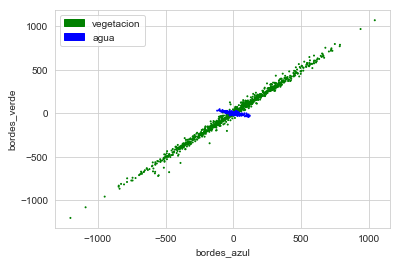

In [32]:
colores = ['green', 'blue']
variables = ["azul", "verde", "rojo", "bordes_azul", "bordes_verde", "bordes_rojo"]

variable1 = variables[3]
variable2 = variables[4]

f1 = df[variable1].values
f2 = df[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar = []
l = len(f3)
print('Cantidad de observaciones: {}'.format(l))
print('Cantidad de clases: {}'.format(2))
print('Cantidad de variables/dimension: {}'.format(6))
print('Se grafican de a dos (dimensión 2)')

for i in range(l):
    if f3[i] == 0:
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)

patch1 = mpatches.Patch(color=colores[0], label='vegetacion')
patch2 = mpatches.Patch(color=colores[1], label='agua')

plt.legend(handles=[patch1, patch2])
plt.show()

Procedamos a realizar una clasificacion usando el dataset de entrenamiento y el algoritmo KNN usando 5 vecinos.

In [33]:
NUM_NEIGHBORS = 5

knn = KNeighborsClassifier(NUM_NEIGHBORS) # Instance classifier
knn.fit(data, target)
print(f'Accuracy del clasificador K-NN en el conjunto de entrenamiento: {knn.score(data, target):.2f}')
print(f'Específicamente el {100 * knn.score(data, target):.2f}% de los datos de entrenamiento fueron clasificados correctamente')

Accuracy del clasificador K-NN en el conjunto de entrenamiento: 1.00
Específicamente el 100.00% de los datos de entrenamiento fueron clasificados correctamente


In [34]:
img_shape = img.shape 
num_rows = img.shape[0]
num_cols = img.shape[1]
print(img_shape)

clasif = np.zeros(img_shape[0:2])


for i in range(num_rows):
    for j in range(num_cols):
        clasif[i,j] = knn.predict([img2[i,j,:]])
        
print('No se puede evaluar el porcentaje de acierto o Presición en el resto de la imagen')
print('Realizaremos una valoración visual')       

(174, 289, 3)
No se puede evaluar el porcentaje de acierto o Presición en el resto de la imagen
Realizaremos una valoración visual


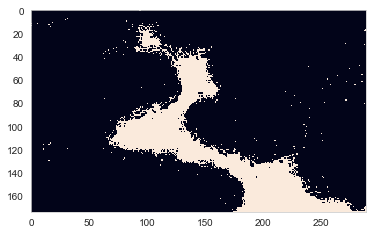

In [35]:
plt.imshow(clasif)
plt.grid(False)
plt.show()

Tratemos de mejorar la clasificacion usando el filtro de Modas (valor mas repetido)

In [36]:
clasif2 = clasif.copy()
for i in range(2, img_shape[0]-2):
    for j in range(2, img_shape[1]-2):
        try:
            clasif2[i,j] = statistics.mode(clasif[i-2:i+3, j-2:j+3].ravel())
        except Exception:
            clasif2[i,j] = clasif[i,j]

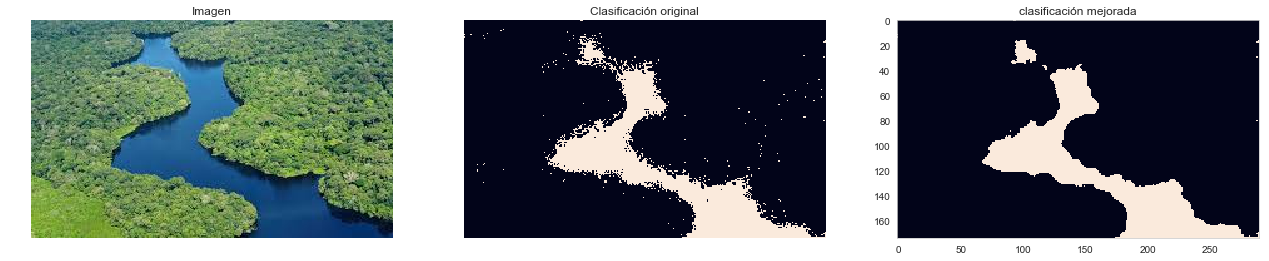

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(15)
fig.set_figwidth(22)

axs[0].imshow(img[:,:,[2,1,0]])
axs[0].set_title("Imagen")
axs[0].axis('off')

axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')

axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')

plt.grid(False)
plt.show()